# Compairing Classifiers for building Machine Learning Models
##### Abu Saleh Mosa Faisal
###### Graduate Student
###### New Mexico Institute of Mining and Technology

In This Notebook I will compare different Machine Learning Classifires to develop an Optimal Model

###### Now I am going to make a synthetic data set for my study.

### 1. Synthetic Data

###### 1.a Importing Library

In [1]:
from sklearn.datasets import make_classification

###### 1.b Generate the dataset

In [2]:
X,Y = make_classification(n_samples=2000, n_classes=2, n_features = 5, n_redundant= 0, random_state= 1)

###### 1.c Let's examine the data features

In [3]:
X.shape

(2000, 5)

In [4]:
Y.shape

(2000,)

### 2. Data Spilt (80/20 ratio) 

##### 2.a Importing Library

In [5]:
from sklearn.model_selection import train_test_split

###### 2.b Data Splitting

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size= 0.2)

##### 2.c Let's Check the data dimension

In [8]:
X_train.shape

(1600, 5)

In [9]:
X_test.shape

(400, 5)

In [10]:
Y_train.shape

(1600,)

### 3. Build Classification Model

#### 3.a Building Models

In [11]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

##### 3.b Defining learning classifiers

In [12]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

In [13]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

##### 3.c Build, Apply on train and test data, record accuracy scores

In [14]:
scores=[]
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score= clf.score(X_test, Y_test)
    scores.append(score)

In [15]:
print(scores)

[0.9125, 0.955, 0.94, 0.9025, 0.9375, 0.8325, 0.9325, 0.9425, 0.95, 0.955, 0.9325, 0.9325, 0.93, 0.94]


### 4. Analysis of Model Performance

##### 4.a Import library

In [21]:
import seaborn as sns

#### 4.b Create data frame of Model performance 

In [17]:
df=pd.DataFrame()
df['names']= names
df['score']= scores
df

,names,score
0,Nearest_Neighbors,0.9125
1,Linear_SVM,0.9550
2,Polynomial_SVM,0.9400
3,RBF_SVM,0.9025
4,Gaussian_Process,0.9375
5,Gradient_Boosting,0.8325
6,Decision_Tree,0.9325
7,Extra_Trees,0.9425
8,Random_Forest,0.9500
9,Neural_Net,0.9550


#### 4.c Adding colors to scores

In [18]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,names,score
0,Nearest_Neighbors,0.912500
1,Linear_SVM,0.955000
2,Polynomial_SVM,0.940000
3,RBF_SVM,0.902500
4,Gaussian_Process,0.937500
5,Gradient_Boosting,0.832500
6,Decision_Tree,0.932500
7,Extra_Trees,0.942500
8,Random_Forest,0.950000
9,Neural_Net,0.955000


#### 4.d Bar plot for model performance 

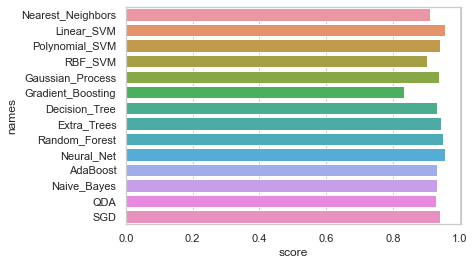

In [20]:
sns.set(style="whitegrid")
ax = sns.barplot(y="names", x="score", data=df)